# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from pmlb import fetch_data

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting display resolution of plots
mpl.rcParams['figure.dpi']= 150

In [3]:
# fetch spambase dataset
X, y = fetch_data('spambase', return_X_y=True, local_cache_dir='data/')
print(X.shape)
print(y.shape)

(4601, 57)
(4601,)


In [4]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [5]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(1-accuracy_score(y_true,y_pred))

# define optimizer object
opt = FCVOpt(clf,param_bounds,sqrt_mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=50,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 5.295e-01 4.332e-01 7.576e-02
     1 5.367e-01 4.483e-01 6.609e-02
     2 5.186e-01 4.301e-01 7.099e-02
     3 4.801e-01 3.958e-01 8.137e-02
     4 4.601e-01 3.345e-01 8.897e-02
     5 3.297e-01 1.674e-01 1.296e-01
     6 2.651e-01 1.386e-01 1.305e-01
     7 2.528e-01 1.880e-01 1.364e-01
     8 2.431e-01 1.831e-01 1.487e-01
     9 2.552e-01 1.963e-01 1.523e-01
  iter    f_best   acq_best    sigma_f
    10 2.484e-01 2.160e-01 1.524e-01
    11 2.531e-01 2.138e-01 1.358e-01
    12 2.488e-01 2.159e-01 1.244e-01
    13 2.540e-01 2.187e-01 1.451e-01
    14 2.504e-01 2.255e-01 1.347e-01
    15 2.526e-01 2.319e-01 1.278e-01
    16 2.526e-01 2.380e-01 1.275e-01
    17 2.525e-01 2.350e-01 1.261e-01
    18 2.511e-01 2.330e-01 1.320e-01
    19 2.513e-01 2.302e-01 1.331e-01
  iter    f_best   acq_best    sigma_f
    20 2.482e-01 2.330e-01 1.617e-01
    21 2.514e-01 2.377e-01 1.371e-01
    22 2.506e-01 2.383e-01 1.195e-01
    23 2.505e-01 2.393e-01 1.185

{'x_best': array([2.20264658e+04, 2.19358454e-04]),
 'f_best': 0.24643926284347126,
 'acq_cand': 0.23811781196973578,
 'x_cand': array([2.20264658e+04, 2.19358454e-04])}

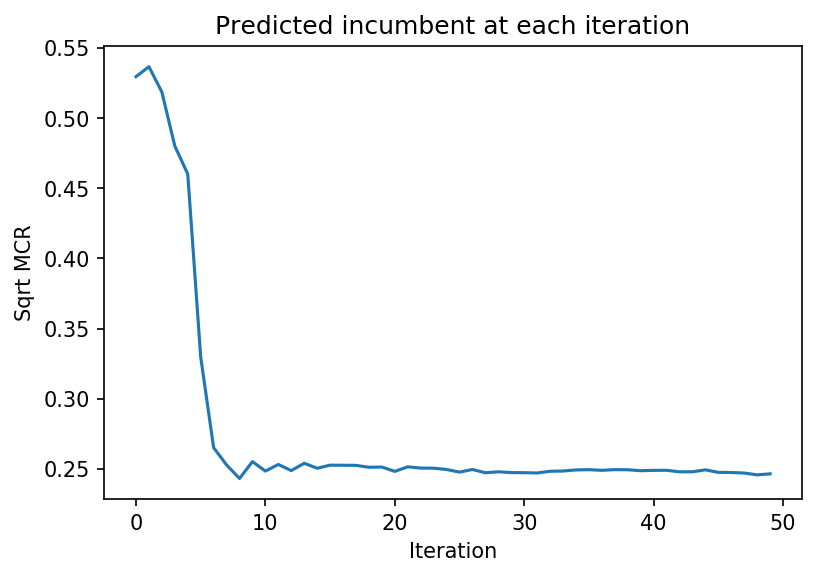

In [6]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt MCR')
plt.title('Predicted incumbent at each iteration')
plt.show()

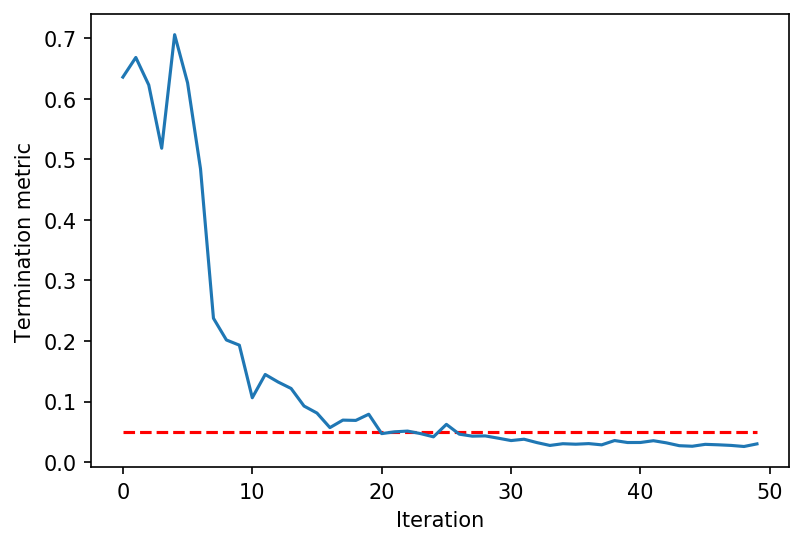

In [7]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.show()